#### A: Download the car evaluation dataset from UCI Machine Learning Repository:
https://archive.ics.uci.edu/dataset/19/car+evaluation

#### B: Use the first 80% data points in each class (unacceptable, acceptable, good, very good) as training data and the rest as test data.

In [60]:
### Your code here
import pandas as pd

column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df = pd.read_csv('car.data', header=None, names=column_names)

unacc = df[df['class'] == 'unacc']
acc = df[df['class'] == 'acc']
good = df[df['class'] == 'good']
vgood = df[df['class'] == 'vgood']

unaccTrain = unacc.iloc[0:968]
unaccTest = unacc.iloc[968:1210]
accTrain = acc.iloc[0:307]
accTest = acc.iloc[307:384]
goodTrain = good.iloc[0:55]
goodTest = good.iloc[55:69]
vgoodTrain = vgood.iloc[0:52]
vgoodTest = vgood.iloc[52:65]

train = pd.concat([unaccTrain, accTrain, goodTrain, vgoodTrain])
test = pd.concat([unaccTest, accTest, goodTest, vgoodTest])

train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

#### C: Build a decision tree on the training set and plot it. Use gini index. If you are unsure about other hyperparameters of the algorithm, use sklearn’s default values.

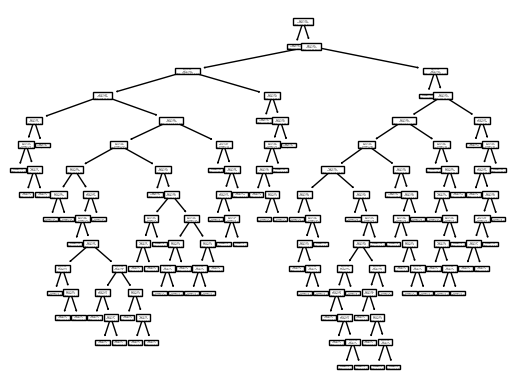

In [84]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

X_Train = train.iloc[:, 0:6].copy()
Y_Train = train.iloc[:, 6].copy()
X_Test = test.iloc[:, 0:6].copy()
Y_Test = test.iloc[:, 6].copy()

label_encoder = LabelEncoder()

for col in X_Train.columns:
    X_Train.loc[:, col] = label_encoder.fit_transform(X_Train[col])
    X_Test.loc[:, col] = label_encoder.transform(X_Test[col])

Y_Train = label_encoder.fit_transform(Y_Train)
Y_Test = label_encoder.transform(Y_Test)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_Train, Y_Train)

tree.plot_tree(clf)

print()


#### D: Convert the decision rules into a set of IF-THEN rules

In [86]:
### Your code here
from sklearn.tree import export_text

feature_names = list(X_Train.columns)
tree_rules = export_text(clf, feature_names=feature_names)

print(tree_rules)

|--- persons <= 0.50
|   |--- class: 2
|--- persons >  0.50
|   |--- safety <= 0.50
|   |   |--- maint <= 2.50
|   |   |   |--- buying <= 0.50
|   |   |   |   |--- doors <= 0.50
|   |   |   |   |   |--- lug_boot <= 1.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- lug_boot >  1.50
|   |   |   |   |   |   |--- persons <= 1.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- persons >  1.50
|   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |--- doors >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- buying >  0.50
|   |   |   |   |--- buying <= 2.50
|   |   |   |   |   |--- lug_boot <= 1.50
|   |   |   |   |   |   |--- maint <= 0.50
|   |   |   |   |   |   |   |--- buying <= 1.50
|   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |   |--- buying >  1.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- maint >  0.50
|   |   |   |   |   |   |   |--- doors <= 1.50
|   |   |   |   |   |   | 

#### E: Test the decision tree on your test set and report your test error

In [80]:
### Your code here
from sklearn.metrics import accuracy_score

Y_Pred = clf.predict(X_Test)

accuracy = accuracy_score(Y_Test, Y_Pred)

test_error = 1 - accuracy

print(f"Accuracy on test set: {accuracy:.4f}")
print(f"Test error: {test_error:.4f}")


Accuracy on test set: 0.8382
Test error: 0.1618
